# Titanic Kaggle Submmission

## 1. Importing necessary libraries

In [1]:
# Standard Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# Machine Learning 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

## 2. Reading the datasets

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
gender_submission = pd.read_csv('gender_submission.csv')

### 2.1 Descriptions of Columns

Survival: 0 = No, 1 = Yes

pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

## 3. Exploratory data analysis

### 3.1 Some stats about the datasets

In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
len(train)

891

In [15]:
len(test)

418

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
list_survived = []

list_survived.append(train['Survived'].value_counts())

In [21]:
print(list_survived)

[0    549
1    342
Name: Survived, dtype: int64]


In [22]:
print(list_survived[0][0])
print(list_survived[0][1])

549
342


### 3.2 Some informative plots about dataset

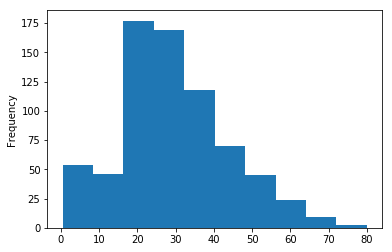

In [23]:
train.Age.plot.hist();

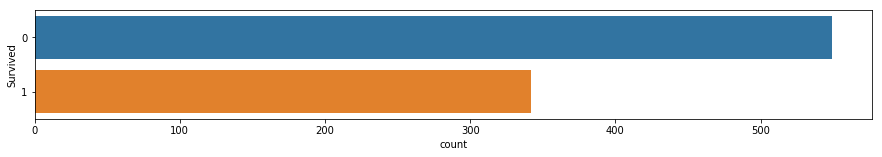

In [24]:
# How many people survived?
fig = plt.figure(figsize=(15,2))
sns.countplot(y='Survived', data=train);

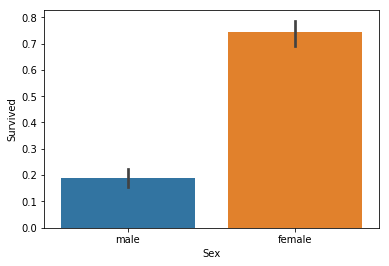

In [25]:
sns.barplot(x='Sex', y='Survived', data=train);

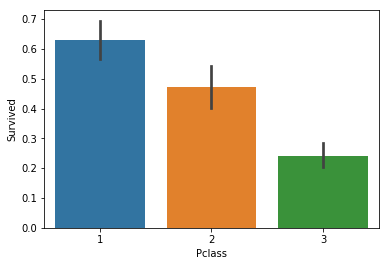

In [26]:
sns.barplot(x='Pclass', y='Survived', data=train);

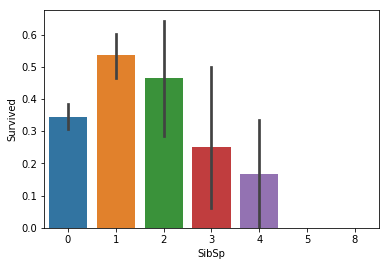

In [27]:
sns.barplot(x='SibSp', y='Survived', data=train);

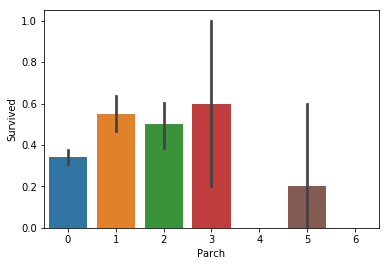

In [28]:
sns.barplot(x='Parch', y='Survived', data=train);

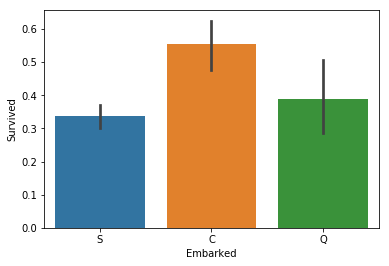

In [29]:
sns.barplot(x='Embarked', y='Survived', data=train);

## 4. Feature engineering

### 4.1 Feature engineering on the Name column

In [30]:
# combining two datasets

train_test = [train, test] 

for column in train_test:
    column['Title'] = column['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [32]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Lady          1
Sir           1
Mme           1
Capt          1
Jonkheer      1
Countess      1
Ms            1
Don           1
Name: Title, dtype: int64

In [33]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

In [34]:
for column in train_test:
    column['Title'] = column['Title'].map(title_mapping)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


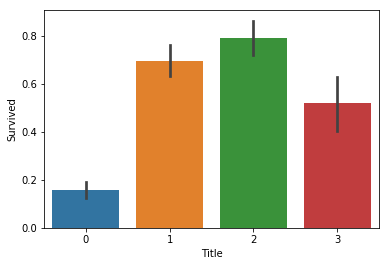

In [37]:
sns.barplot(x='Title', y='Survived', data=train);

In [38]:
# We do not need Name column anymore as we extracted Title field from the Name column

train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [40]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### 4.2 Feature Engineering on Age column

In [41]:
# As we have seen before, there are many missing values in age column, so we have to fill them logically

In [42]:
train['Age'].isnull().sum()

177

In [43]:
# Filling the NaN values in age column with mean age for every title (Mr, Mrs, Miss etc.)

train["Age"].fillna(train.groupby("Title")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("mean"), inplace=True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


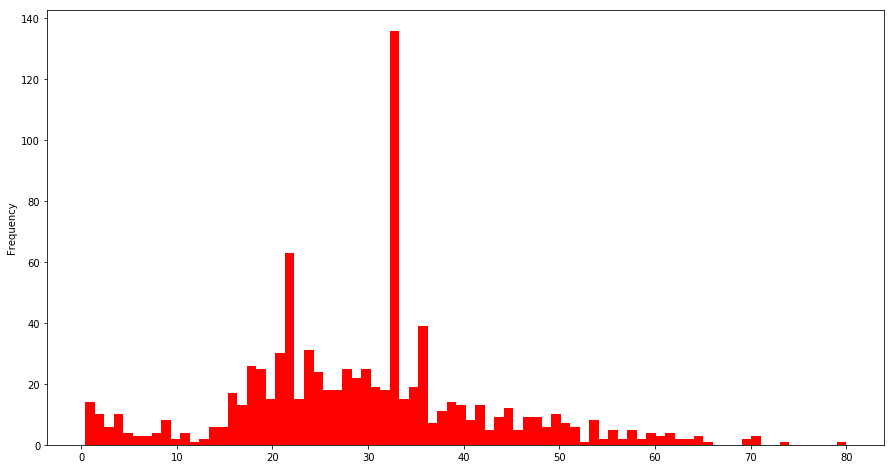

In [45]:
train.Age.plot.hist(bins=80, color = 'red', figsize=(15,8));

### 4.3 Feature Engineering on Sex column

In [46]:
# Changing the names "male" and "female" into computer readible format as 0 and 1

sex = {"male": 0, "female": 1}
for column in train_test:
    column['Sex'] = column['Sex'].map(sex)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [48]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


In [49]:
# There are values which are not a full number in "Age" column, so we will round the them to have full only full numbers
train['Age'] = train['Age'].round()
test['Age'] = test['Age'].round()

In [50]:
# We can see that, now we have only full numbers as features
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


### 4.4 Feature Engineering on Embarked column

In [51]:
# Checking the number of total NaN values
train['Embarked'].isnull().sum()

2

In [52]:
test['Embarked'].isnull().sum()

0

In [53]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [54]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

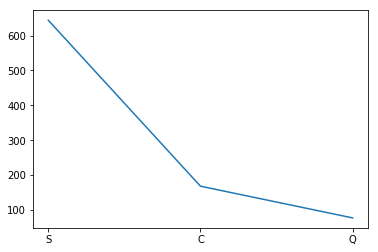

In [55]:
# As we can observe from the line graph, most of the passengers are frpm S class, so we will fill missing values with S
plt.plot(train['Embarked'].value_counts())

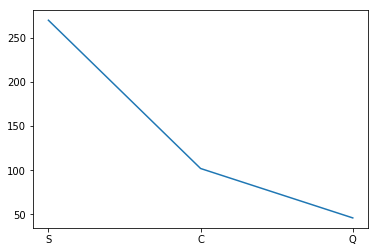

In [56]:
plt.plot(test['Embarked'].value_counts())

In [57]:
# The missing two NaN values in train data is filled by "S" which stands for Southampton
for column in train_test:
    column['Embarked'] = column['Embarked'].fillna('S')

In [58]:
# And as we did before, we also map "S", "C" and 'Q' into 0, 1 and 2 for computer readability

embarked = {"S": 0, "C": 1, "Q": 2}

In [59]:
for column in train_test:
    column['Embarked'] = column['Embarked'].map(embarked)

In [60]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1


In [61]:
test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,2,0


### 4.5 Feature Engineering on Fare column

In [62]:
train['Fare'].isnull().sum()

0

In [63]:
test['Fare'].isnull().sum()

1

In [64]:
# There a NaN value in test data for Fare column, we fill it with mean value of each PClass
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

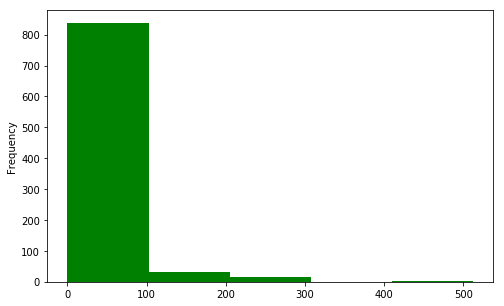

In [65]:
train.Fare.plot.hist(bins=5, color = 'green', figsize=(8,5));

### 4.6 Feature Engineering on Cabin column

In [66]:
train['Cabin'].isnull().sum()

687

In [67]:
test['Cabin'].isnull().sum()

327

In [68]:
# We can see that, most of the entries (almost 80%) is NaN values, that's why I decided to drop the Cabin column
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)

In [69]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,0,0


### 4.7 Feature Engineering on Ticket column

In [71]:
# Ticket number is not going to play any role for our Machine Learning purposes, that's why I am going to drop it as well

train = train.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)

In [72]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,2
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,0,35.0,0,0,8.0500,0,0


In [73]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.0,0,0,7.8292,2,0
1,893,3,1,47.0,1,0,7.0000,0,2
2,894,2,0,62.0,0,0,9.6875,2,0
3,895,3,0,27.0,0,0,8.6625,0,0
4,896,3,1,22.0,1,1,12.2875,0,2


### 4.8 Creating a copy of train dataset which does not include "Survived" column

In [266]:
target_data = train.drop(['Survived', 'PassengerId'], axis=1)
target = train['Survived']

In [267]:
test_data = test.drop('PassengerId', axis = 1)

In [268]:
target_data .shape, target.shape

((891, 8), (891,))

In [269]:
target_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,2
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,2
4,3,0,35.0,0,0,8.0500,0,0


In [270]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [271]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.0,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,0,2
2,2,0,62.0,0,0,9.6875,2,0
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,2


## 5. Modelling and Predicting Train Data

In [242]:
# There is no missing values in train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [244]:
# There is no missing data in target_data dataset which we will use to train our models
target_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
Title       891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [243]:
# There is no missing values in test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [245]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [246]:
clf = DecisionTreeClassifier(max_depth = 3)
dtc_score = cross_val_score(clf, target_data, target, cv=k_fold, scoring='roc_auc')
print(dtc_score)

[0.90196078 0.84689266 0.8256396  0.8312369  0.87216249 0.86735261
 0.85089099 0.82174638 0.88538462 0.88196555]


In [247]:
# DecisionTreeClassifier Average Score
round(np.mean(dtc_score)*100, 1)

85.9

In [260]:
clf = RandomForestClassifier(n_estimators=300)
rfc_score = cross_val_score(clf, target_data, target, cv=k_fold, scoring = 'roc_auc')
print(rfc_score)

[0.87606838 0.87090395 0.84288098 0.86084906 0.91397849 0.86651835
 0.87997904 0.82313682 0.83358974 0.89209726]


In [261]:
# Random Forest Average Score
round(np.mean(rfc_score)*100, 1)

86.6

In [250]:
clf = LogisticRegression()
lr_score = cross_val_score(clf, target_data, target, cv=k_fold, scoring = 'roc_auc')
print(lr_score)

[0.88838612 0.82429379 0.85650723 0.85089099 0.8823178  0.8403782
 0.8254717  0.88014461 0.90205128 0.91691996]


In [251]:
# Logistic Regression Average Score
round(np.mean(lr_score)*100, 1)

86.7

In [252]:
clf = GradientBoostingClassifier(learning_rate=0.15, n_estimators=75)
gbc_score = cross_val_score(clf, target_data, target, cv=k_fold, n_jobs=1, scoring = 'roc_auc')
print(gbc_score)

[0.90095525 0.9039548  0.81896552 0.83962264 0.90382318 0.86095662
 0.88548218 0.86846496 0.86666667 0.92401216]


In [253]:
# Gradient Boosting Classifier average Score
round(np.mean(gbc_score)*100, 1)

87.7

In [254]:
clf = GaussianNB()
gnb_score = cross_val_score(clf, target_data, target, cv=k_fold, scoring = 'roc_auc')
print(gnb_score)

[0.87531423 0.83898305 0.80088988 0.8052935  0.82078853 0.84705228
 0.86163522 0.85122358 0.86820513 0.88804458]


In [255]:
# GaussianNB average Score
round(np.mean(gnb_score)*100, 1)

84.6

## 6. Testing and Submitting

In [263]:
# We use GradientBoostingClassifier, because we had the highest score with it
clf = GradientBoostingClassifier(learning_rate=0.15, n_estimators=75)
clf.fit(target_data, target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=75,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [273]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.0,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,0,2
2,2,0,62.0,0,0,9.6875,2,0
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,2


In [274]:
prediction = clf.predict(test_data)

In [276]:
# Now we create CSV file for the kaggle submission

kaggle_titanic = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": prediction})

kaggle_titanic.to_csv('kaggle_titanic.csv', index=False)

In [277]:
# Reading the csv that we have just created
kaggle_submission_data = pd.read_csv('kaggle_titanic.csv')

In [280]:
# First 20 entries of the kaggle submission data
kaggle_submission_data.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
